In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load integrated dataset for Retailers
df_r = pd.read_csv("Integrated_Retailers.csv")

# Check the first few rows to verify columns
print(df_r.head())


   Day Employee_ID   Name  Target_Sales  Actual_Sales  Completion_Time (mins)  \
0    1         R01  Kumar            10            10                     479   
1    1         R02  Leena            10            10                     488   
2    1         R03  Mohit            10            10                     464   
3    1         R04  Nisha            10            10                     502   
4    1         R05     Om            10            10                     488   

   Feedback_Rating  Order_Volume  Sales_Ratio  Sales_Demand_Ratio  \
0              4.5           112          1.0                0.56   
1              4.3           112          1.0                0.56   
2              4.9           112          1.0                0.56   
3              3.9           112          1.0                0.56   
4              4.4           112          1.0                0.56   

   Underperform  
0             0  
1             0  
2             0  
3             0  
4       

In [3]:
# Define features and target (Assuming "Underperform" is already created)
feature_cols_r = [
    "Completion_Time (mins)",
    "Feedback_Rating",
    "Sales_Ratio",         # Calculated as Actual_Sales / Target_Sales
    "Sales_Demand_Ratio"   # Order_Volume divided by (20 * Target_Sales)
]
X_r = df_r[feature_cols_r]
y_r = df_r["Underperform"]

In [4]:
# Split the data (80% training, 20% testing)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_r, y_r, test_size=0.2, random_state=42, stratify=y_r
)

In [5]:
# Train a Random Forest model
rf_r = RandomForestClassifier(n_estimators=100, random_state=42)
rf_r.fit(X_train_r, y_train_r)

RandomForestClassifier(random_state=42)

In [6]:
# Predict on the test set and evaluate
y_pred_r = rf_r.predict(X_test_r)
print("Retailers Model Accuracy:", accuracy_score(y_test_r, y_pred_r))
print("Retailers Classification Report:\n", classification_report(y_test_r, y_pred_r))
print("Retailers Confusion Matrix:\n", confusion_matrix(y_test_r, y_pred_r))

Retailers Model Accuracy: 1.0
Retailers Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        24

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Retailers Confusion Matrix:
 [[96  0]
 [ 0 24]]


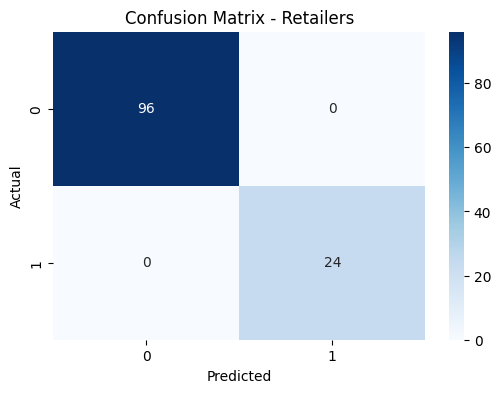

In [7]:
# Optional: Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_r, y_pred_r), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Retailers")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Completion_Time (mins): 0.016
Feedback_Rating: 0.013
Sales_Ratio: 0.959
Sales_Demand_Ratio: 0.012


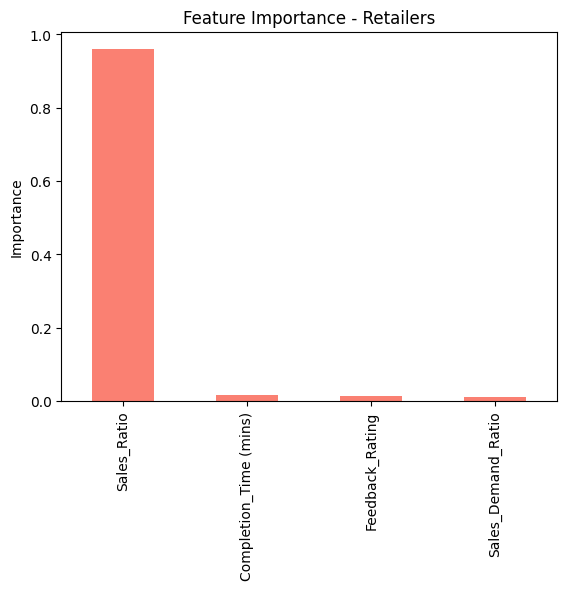

In [8]:
# Assuming rf_r is your trained RandomForestClassifier for Retailers and feature_cols_r is defined
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances_r = rf_r.feature_importances_
for feat, imp in zip(feature_cols_r, importances_r):
    print(f"{feat}: {imp:.3f}")

# Plot feature importances
feat_importances_r = pd.Series(importances_r, index=feature_cols_r).sort_values(ascending=False)
feat_importances_r.plot(kind='bar', title='Feature Importance - Retailers', color='salmon')
plt.ylabel('Importance')
plt.show()


In [9]:
from joblib import dump

# Assuming rf_r is your trained Retailers model
dump(rf_r, "rf_r_model.joblib")
print("Retailers model saved as rf_r_model.joblib")


Retailers model saved as rf_r_model.joblib
